# Results of different #agent values

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner', 'damage', 'num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabledIterativeAssignmentPlanner,50,10,1.1,5,266.2426349671643,0.0,4342.821520294628,6
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,123.771683,0.015038,3173.554213,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,134.356123,0.047240,6245.700774,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,162.709001,0.201561,14371.403617,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,194.968338,0.436473,23781.878009,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,200.058699,0.745959,33606.868869,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'TravelingLinePlanner', 'SeparateTravelingPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

IterativeAssignmentPlanner: 11
KmeansAssignmentPlanner: 11
StaticLinePlanner: 11
TravelingLinePlanner: 0
SeparateTravelingPlanner: 0


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabledIterativeAssignmentPlanner,50,10,1.1,5,266.2426349671643,0.0,4342.821520294628,6
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,123.771683,0.015038,3173.554213,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,134.356123,0.047240,6245.700774,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,162.709001,0.201561,14371.403617,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,194.968338,0.436473,23781.878009,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,200.058699,0.745959,33606.868869,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IterativeAssignmentPlanner,500,10.0,2.0,5.0,201.096098,1.347379,44591.325806,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IterativeAssignmentPlanner,600,10.0,2.0,5.0,207.011860,1.957500,56630.858074,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,IterativeAssignmentPlanner,700,10.0,2.0,5.0,215.797011,5.723255,70048.356259,698.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IterativeAssignmentPlanner,800,10.0,2.0,5.0,213.778260,4.907195,84369.622209,786.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,IterativeAssignmentPlanner,900,10.0,2.0,5.0,212.504508,5.145718,95675.350278,881.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

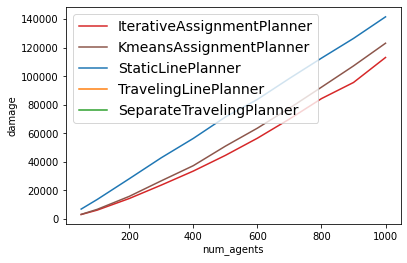

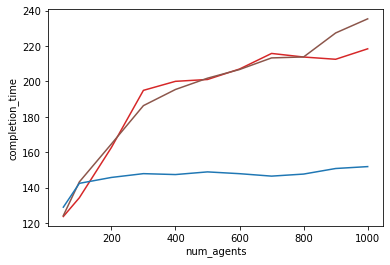

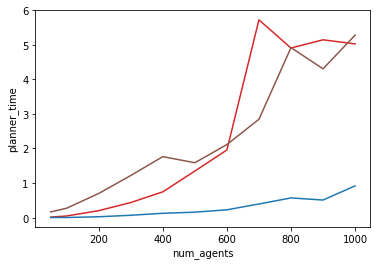

KeyError: 'num_disabled'

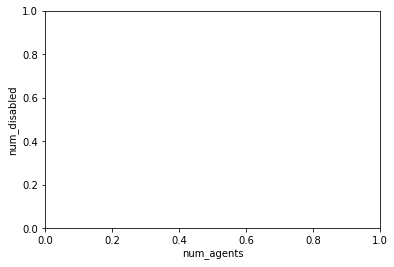

In [52]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 0:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()